<a href="https://colab.research.google.com/github/C-Little26/ECGR4105/blob/main/ECGR4105_Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ECGR 4105 Homework 2
#Written by Chris Little

In [2]:
#Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
#import dataset
filepath = '/content/drive/My Drive/Machine Learning/Datasets/Housing.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read csv into a dataframe
housing = pd.DataFrame(pd.read_csv(filepath))
#check for matrix size and null values

In [4]:
#remap yes/no variables to numeric data
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# define a map function to replace yes/no variables
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [5]:
#separate training and validation sets
np.random.seed(0)
train, val = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished


In [6]:
def gradient_descent(train, test, price_train, price_test, alpha, theta, iterations):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta = theta - alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses


In [7]:
#create column vectors from dataset
train_price = train.values[:,0]
val_price = val.values[:,0]
#add a few necessary variables
theta_a = np.zeros(6)
theta_b = np.zeros(12)
iterations = 1500
#lengths
train_len = len(train_price)
val_len = len(val_price)
#part a's will use area, bedrooms, bathrooms, stories, parking
vars_a = ['area','bedrooms','bathrooms','stories','parking']
train_a = np.c_[np.ones((train_len, 1)), train[vars_a]]
val_a = np.c_[np.ones((val_len, 1)), val[vars_a]]
#part b's will use area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
vars_b = ['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']
train_b = np.c_[np.ones((len(train_price), 1)), train[vars_b]]
val_b = np.c_[np.ones((len(val_price),1)), val[vars_b]]


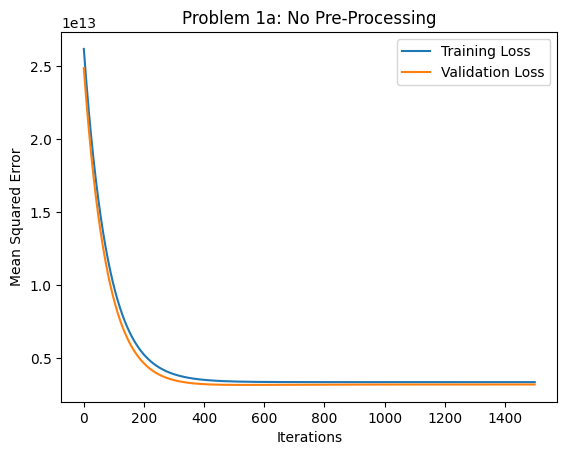

In [8]:
#Problem 1a
alpha_1a = 0.0000000001
train_losses_1a, val_losses_1a = gradient_descent(train_a, val_a, train_price, val_price, alpha_1a, theta_a, iterations)
plt.plot(train_losses_1a, label="Training Loss")
plt.plot(val_losses_1a, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 1a: No Pre-Processing")
plt.show()

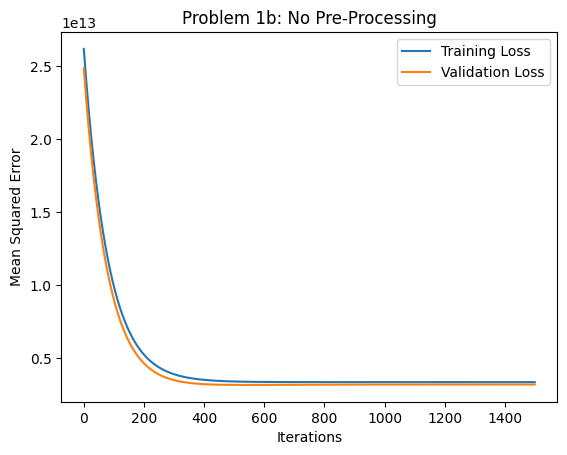

In [9]:
#Problem 1b
alpha_1b = 0.0000000001
train_losses_1b, val_losses_1b = gradient_descent(train_b, val_b, train_price, val_price, alpha_1b, theta_b, iterations)
plt.plot(train_losses_1b, label="Training Loss")
plt.plot(val_losses_1b, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 1b: No Pre-Processing")
plt.show()

In [10]:
#pre-processing for p2 w/ normalization
from sklearn.preprocessing import MinMaxScaler
normal = MinMaxScaler()
m=len(train)
m_val=len(val)
scale_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
train_normal = train
val_normal = val
train_normal[scale_vars] = normal.fit_transform(train_normal[scale_vars])
val_normal[scale_vars] = normal.fit_transform(val_normal[scale_vars])
#normalize matrices for training
train_2a_norm = np.c_[np.ones((m, 1)), train_normal[vars_a]]
train_2b_norm = np.c_[np.ones((m,1)), train_normal[vars_b]]
#normalize matrices for val
val_2a_norm = np.c_[np.ones((m_val,1)), val_normal[vars_a]]
val_2b_norm = np.c_[np.ones((m_val,1)), val_normal[vars_b]]

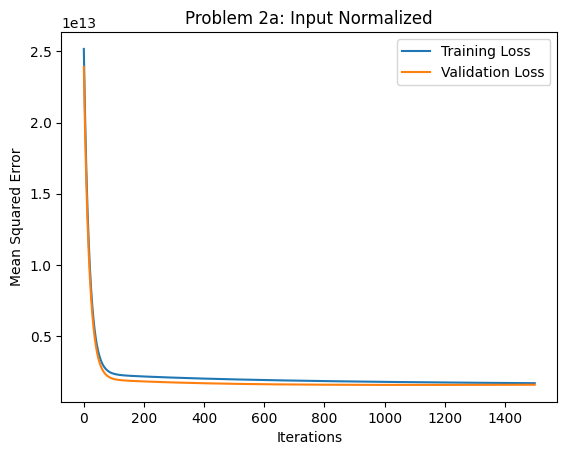

In [11]:
alpha_2a = 0.01
train_loss_2a, val_loss_2a = gradient_descent(train_2a_norm, val_2a_norm, train_price, val_price, alpha_2a, theta_a, iterations)
plt.plot(train_loss_2a, label="Training Loss")
plt.plot(val_loss_2a, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 2a: Input Normalized")
plt.show()

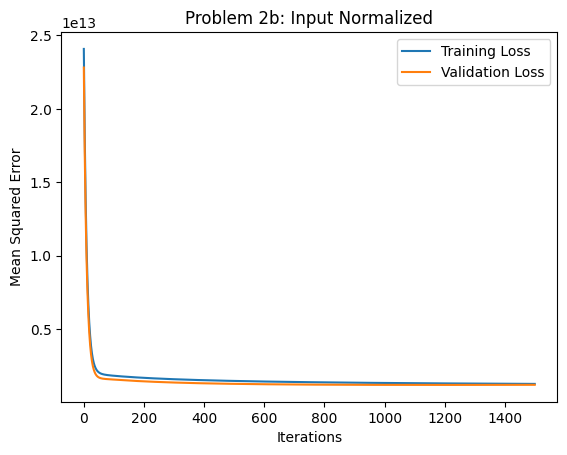

In [12]:
alpha_2b = 0.01
train_loss_2b, val_loss_2b = gradient_descent(train_2b_norm, val_2b_norm, train_price, val_price, alpha_2b, theta_b, iterations)
plt.plot(train_loss_2b, label="Training Loss")
plt.plot(val_loss_2b, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 2b: Input Normalized")
plt.show()

In [13]:
#testing a normalized output

In [14]:
#pre-processing for p2 w/ standardization
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
#use the same scale_vars used for normalization
train_standard = train
val_standard = val
train_standard[scale_vars] = standard.fit_transform(train_standard[scale_vars])
val_standard[scale_vars] = standard.fit_transform(val_standard[scale_vars])
#standardize training matrices
train_2a_stand = np.c_[np.ones((m,1)), train_standard[vars_a]]
train_2b_stand = np.c_[np.ones((m,1)), train_standard[vars_b]]
#standardize val matrices
val_2a_stand = np.c_[np.ones((m_val, 1)), val_standard[vars_a]]
val_2b_stand = np.c_[np.ones((m_val, 1)), val_standard[vars_b]]
print(train_2a_stand)

[[ 1.          1.35187274  0.07867901 -0.57989658 -0.92902305  0.31148433]
 [ 1.          0.56532627  0.07867901  1.41092949  2.4747925  -0.8492607 ]
 [ 1.          0.746837   -1.29348292 -0.57989658 -0.92902305  1.47222936]
 ...
 [ 1.         -0.80298534 -1.29348292 -0.57989658  0.20558213  0.31148433]
 [ 1.          0.39777791  0.07867901  1.41092949  1.34018732 -0.8492607 ]
 [ 1.          1.18897851 -1.29348292 -0.57989658 -0.92902305 -0.8492607 ]]


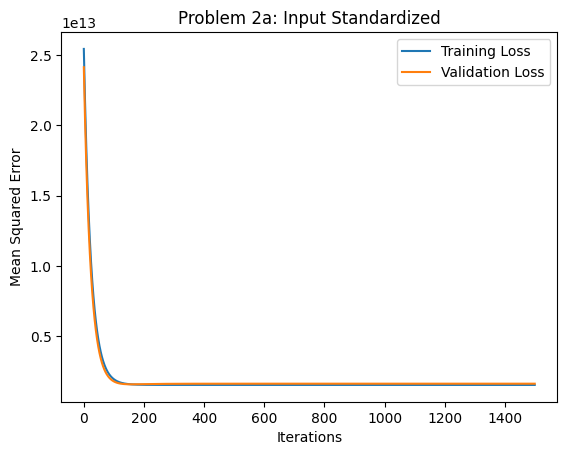

In [15]:
alpha_2as = 0.01
train_loss_2as, val_loss_2as = gradient_descent(train_2a_stand, val_2a_stand, train_price, val_price, alpha_2as, theta_a, iterations)
plt.plot(train_loss_2as, label="Training Loss")
plt.plot(val_loss_2as, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 2a: Input Standardized")
plt.show()

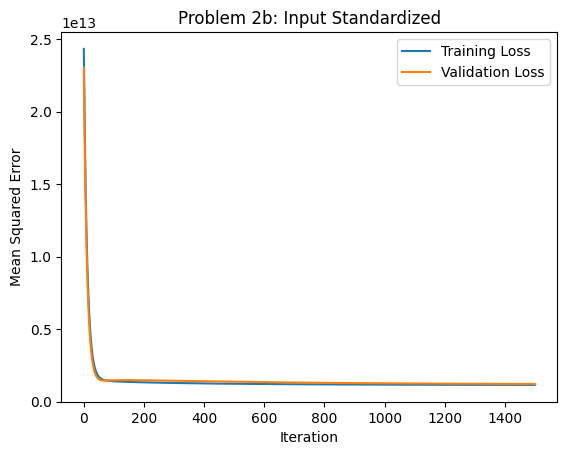

In [16]:
alpha_2bs = 0.01
train_loss_2bs, val_loss_2bs = gradient_descent(train_2b_stand, val_2b_stand, train_price, val_price, alpha_2bs, theta_b, iterations)
plt.plot(train_loss_2bs, label="Training Loss")
plt.plot(val_loss_2bs, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 2b: Input Standardized")
plt.show()

In [17]:
#Problem 3
#Introduce parameter penalties to the gradient descent function
def gradient_descent_pen(train, test, price_train, price_test, alpha, theta, iterations, penalty):
    train_losses = []
    val_losses = []

    for iteration in range(iterations):
        gradients = 2/(len(train)) * train.T.dot(train.dot(theta) - price_train)
        theta = theta - alpha * gradients

        train_loss = (1/len(train)) * np.sum(np.square(train.dot(theta) - price_train))
        train_loss = (1/len(train)) * (np.sum(np.square(train.dot(theta) - price_train)) + penalty*np.square(np.sum(theta)))
        val_loss = (1/len(test)) * np.sum(np.square(test.dot(theta) - price_test))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses


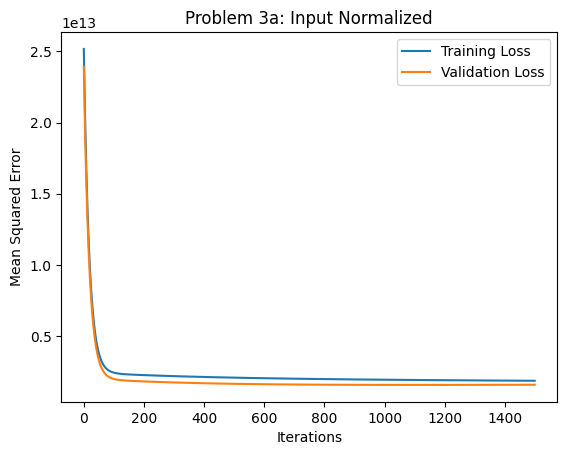

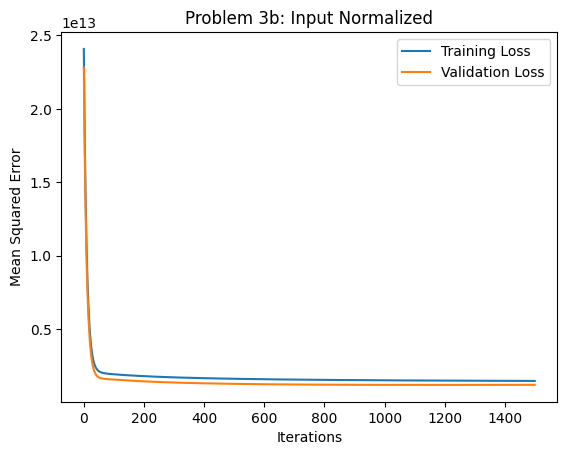

In [18]:
#copy normalized data from p2
train_3an = train_2a_norm
train_3bn = train_2b_norm
val_3an = val_2a_norm
val_3bn = val_2b_norm

para_pen_3an = 0.5 #Penalty Parameter, lambda wouldn't work

alpha_3an = 0.01
train_loss_3an, val_loss_3an = gradient_descent_pen(train_3an, val_3an, train_price, val_price, alpha_3an, theta_a, iterations, para_pen_3an)
plt.plot(train_loss_3an, label="Training Loss")
plt.plot(val_loss_3an, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3a: Input Normalized")
plt.show()

para_pen_3bn = 0.5
alpha_3bn = 0.01
train_loss_3bn, val_loss_3bn = gradient_descent_pen(train_3bn, val_3bn, train_price, val_price, alpha_3bn, theta_b, iterations, para_pen_3bn)
plt.plot(train_loss_3bn, label="Training Loss")
plt.plot(val_loss_3bn, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3b: Input Normalized")
plt.show()

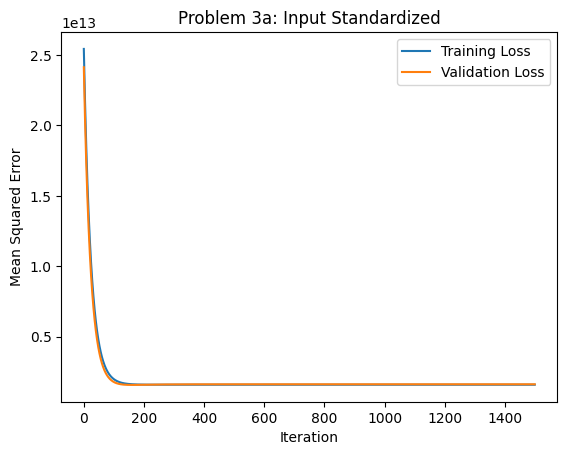

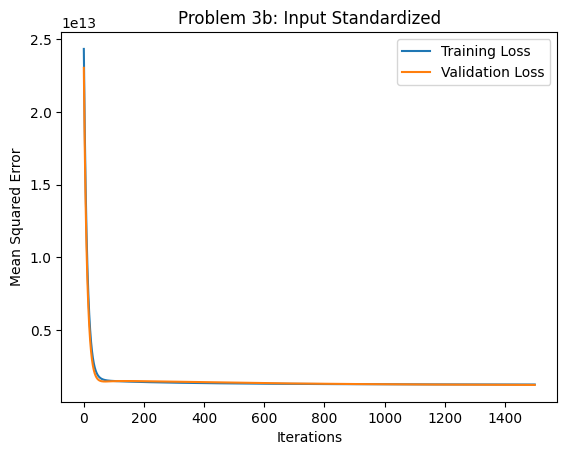

In [19]:
#copy standardized data from p2
train_3as = train_2a_stand
train_3bs = train_2b_stand
val_3as = val_2a_stand
val_3bs = val_2b_stand

para_pen_3as = 0.5 #Penalty Parameter, lambda wouldn't work

alpha_3as = 0.01
train_loss_3as, val_loss_3as = gradient_descent_pen(train_3as, val_3as, train_price, val_price, alpha_3as, theta_a, iterations, para_pen_3as)
plt.plot(train_loss_3as, label="Training Loss")
plt.plot(val_loss_3as, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3a: Input Standardized")
plt.show()

para_pen_3bs = 0.5
alpha_3bs = 0.01
train_loss_3bs, val_loss_3bs = gradient_descent_pen(train_3bs, val_3bs, train_price, val_price, alpha_3bs, theta_b, iterations, para_pen_3bs)
plt.plot(train_loss_3bs, label="Training Loss")
plt.plot(val_loss_3bs, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Problem 3b: Input Standardized")
plt.show()